# Introductory applied machine learning (INFR10069)
# Assignment 4: Unsupervised Learning Part B (PCA)

<div align="right"><font color="blue" size="5">Your Score was 60.0 out of a total of 79.0, or 75.9%</font></div>

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 4 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part B of Assignment 4 and deals with the MNIST Dataset - Part A deals with the 20 Newsgroup dataset. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation: **in questions where this is specified, you will be penalised if you go over.**

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 15/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. The Jupyter Notebook for Part A, *and*
 1. This Jupyter Notebook for Part B
 
All submissions happen electronically. To submit:
1. Fill out this notebook (as well as Part A), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **keep the same structure**: retain the questions, **DO NOT** delete any cells and **avoid** adding unnecessary cells unless absolutely necessary, as this makes the job harder for the markers.

1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 04_A_KMeans.ipynb 04_B_PCA.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 04_A_KMeans.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:04_A_KMeans.ipynb
    scp -r [FULL PATH TO 04_B_PCA.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:04_B_PCA.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 04_A_KMeans.ipynb 04_B_PCA.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Both Part A and Part B (this notebook) are each worth 50% of the Total Mark for Assignment 4.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [1]:
%matplotlib inline
%pylab inline

# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# For Getting the Data
from sklearn.datasets import fetch_20newsgroups, load_digits
from sklearn.feature_extraction.text import TfidfVectorizer

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Populating the interactive namespace from numpy and matplotlib


/Users/ayushdas/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## 1. Exploration of the dataset

As in part A, we will automatically download the data we will be using. Execute the cell below, which will download the data, and also output a textual description of the dataset, which you should read. The more interested reader may also look at the official [documentation](http://yann.lecun.com/exdb/mnist/) (note that this is a preprocessed version of the original dataset mentioned in that link).

**Do not change any of the code in this cell.**

In [473]:
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

### ========== Question 1.1 --- [9 marks] ==========

Let us start by familiarising ourselves with the dataset. Note that digits is a python `dict`: we have already used one of its entries (`DESCR`) to get the description above. If you execute `digits.keys()`, you'll see another 4 fields. We will focus our analysis on the `data` and `target` arrays. Occasionally, it may be useful to refer to the `images` field, which is the same as `data` but reshaped to 8x8 images rather than flattened.

&nbsp;&nbsp;**(a)** [Code] Using suitable pandas/numpy methods, summarise the key properties of the `data` and `target` arrays. This should be no more than a few lines of code. *Hint: you may find it helpful to transform the `data` to a Pandas DataFrame.*<br>
&nbsp;&nbsp;**(b)** [Text] Comment on your observations from ***(a)*** (dimensionality, data ranges, anything out of the ordinary). (<5 sentences)<br>

<div align="right"><font color="blue" size="4">7.5/9.0</font></div>

In [474]:
print('The keys in digits are: ',digits.keys())
data_np = digits['data']
data = pd.DataFrame(data_np)
target_np = digits['target']
target = pd.DataFrame(target_np)
print('Analyzing the values of data')
print('The dimensions of data are: ',data.shape)
print(data.dtypes)
data.describe()

The keys in digits are:  dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Analyzing the values of data
The dimensions of data are:  (1797, 64)
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
       ...   
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60    float64
61    float64
62    float64
6

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [581]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


In [476]:
print('Analyzing the values of target')
print('The dimensions of data are: ',target.shape)
print(target.dtypes)
target.describe()

Analyzing the values of target
The dimensions of data are:  (1797, 1)
0    int64
dtype: object


,0
count,1797.000000
mean,4.490818
std,2.865304
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


In [477]:
print(target.head(10))

   0
0  0
1  1
2  2
3  3
4  4
5  5
6  6
7  7
8  8
9  9


<div align="right"><font color="blue" size="4">4.0</font></div>

(b) "digits" is a python dictionary. The keys in digits are:  dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

There are 1797 data points and 64 attributes (columns) in digits.data. Each of these attributes is of type flota64. 
There are 1797 rows in digits.target. Each row in digits.tareget stores a value of type int64. The maximum value in digits.target is 9 and the minimum value is 0.

Although the pandas datafram.dtypes reports each attribute of digits.data of being type float64, on observing the 
value of digits.data it can be seen that each cell of digits.data has an integer(like 0.0 or 5.0) that belongs to the range of [0 to 16], both 0 and 16 included. Each of the values in the cell of digits.data represents the pixel intensity in the image.

<div align="right"><font color="blue" size="4">3.5</font></div>

### ========== Question 1.2 --- [12 marks] ==========

In order to better interpret the values, we will analyse the standard deviation of the data.

&nbsp;&nbsp;**(a)** [Code] Compute the Standard Deviation over the entire mnist dataset as well as on a per-digit basis. Plot the standard-deviations as 8x8 images (you can use `sns.heatmap()`). *Hint: you may find Pandas' [grouping](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) functionality useful.*<br>
&nbsp;&nbsp;**(b)** [Text] Bearing in mind the way in which PCA reduces dimensionality, comment on the relative importance of the 64 dimensions with respect to PCA dimensionality reduction. (1 sentence)<br>
&nbsp;&nbsp;**(c)** [Text] Does the level of standard deviation indicate whether a dimension is important or not for classification? Explain. (4-5 sentences) *Hint: It may be useful to refer to both the global as well as the per-digit visualisations.*

<div align="right"><font color="blue" size="4">9.5/12.0</font></div>

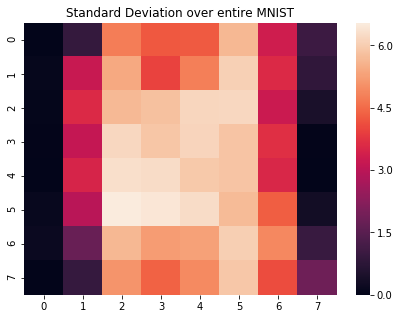

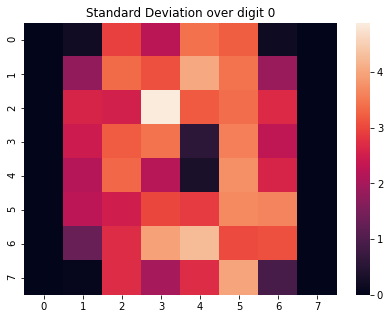

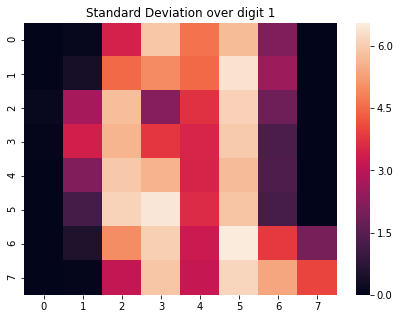

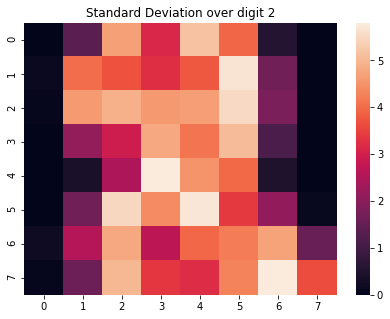

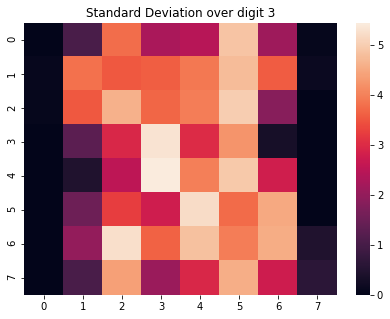

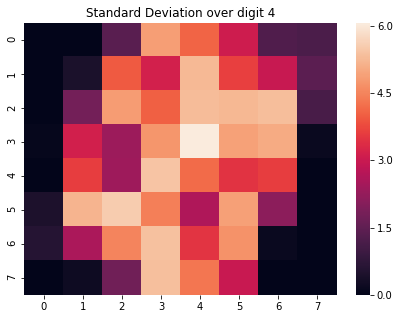

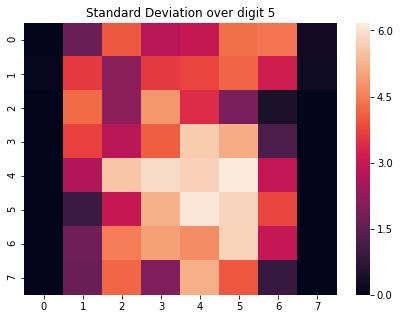

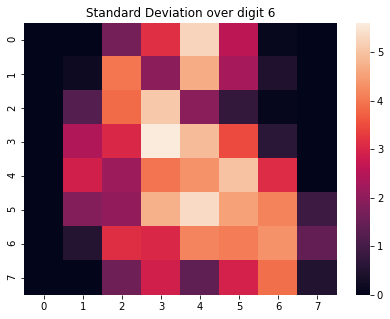

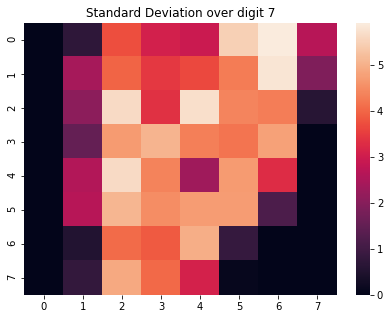

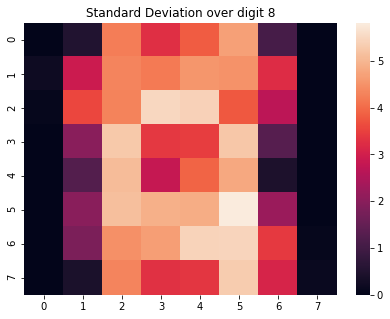

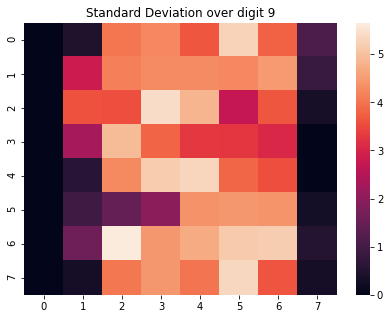

In [585]:
std = data.describe().loc['std']
std = std.values.reshape(8,8)
plt.figure(figsize=(7,5))
plt.title('Standard Deviation over entire MNIST')
sns.heatmap(std)
plt.show()

grouped_data = data.groupby(target_np).std()

digitss = [0,1,2,3,4,5,6,7,8,9]
for digit in digitss: 
    title = 'Standard Deviation over digit '
    std = grouped_data.loc[digit].values.reshape(8,8)
    plt.figure(figsize=(7,5))
    title += str(digit)
    plt.title(title)
    sns.heatmap(std)
    plt.show()


<div align="right"><font color="blue" size="4">5.0</font></div>

<div align="left"><font color="green" size="4">For more points you should have printed the values in the cells.</font></div>

(b) The features within the data set that show more variance (or standarad deviation, as both variance and standard devaition are related) are likely to be relatively more important than features that show lesser variance.

<div align="right"><font color="blue" size="4">1.0</font></div>

(c) The standard deviation is definitely an important factor, in determining the importance of the dimension for classification. Consider the standard deviation plots above. It can be seen that the values in the squares [0][0 to 7] (the first dimension represents the row number and the second dimension represents the range of the column numbers) have very little variation as they are always black. These squares by themselves contribute very little in determining to what class of digit, the image belongs to. Whereas certain other squares in the plots have values that show larger variations as the class changes, and hence contribute more in understanding the class of digit to which the image belongs.

<div align="right"><font color="blue" size="4">3.5</font></div>

## 2. Dimensionality Reduction

### ========== Question 2.1 --- [16 marks] ==========

Let us visualise the explained variance by the PCA components. Familiarise yourself with the [PCA](http://scikit-learn.org/0.19/modules/generated/sklearn.decomposition.PCA.html) class in SKLearn.

&nbsp;&nbsp;**(a)** [Code] Using SKLearn's `PCA` object, transform the MNIST `data` into orthogonal (PCA) components, retaining **all** dimensions (set `n_components` appropriately). Set `svd_solver='full'` and keep all other parameters at default values. Then plot the *percentage* variance explained by each dimension as a `bar`-graph, in descending order of variance. *Hint: see the `explained_variance_ratio_` attribute of the PCA object.* On the same graph, plot (line) the cumululative explained variance as you add components (again in descending order of variance explained). Indicate the point at which 80% of the variance is explained (e.g. using matplotlib's [`vlines()`](https://matplotlib.org/2.2.3/api/_as_gen/matplotlib.pyplot.vlines.html)): label the number of components at this point (e.g. in the Legend). Make sure to distinguish between the plots and label them appropriately.<br>&nbsp;&nbsp;*Tip: you may need to use [`twinx()`](https://matplotlib.org/2.2.3/gallery/api/two_scales.html#sphx-glr-gallery-api-two-scales-py) to better combine the two plots. Also, for consistency, number components starting from 0.* <br>
&nbsp;&nbsp;**(b)** [Text] By commenting on the shape of the plot, why do you think 80% of the variance seems like a reasonable threshold? *Hint: Think about why we do PCA*. (<3 sentences)<br>
&nbsp;&nbsp;**(c)** [Text] What can you say about the number of components required to explain 80% of the variance? (<4 sentences)

<div align="right"><font color="blue" size="4">14.0/16.0</font></div>

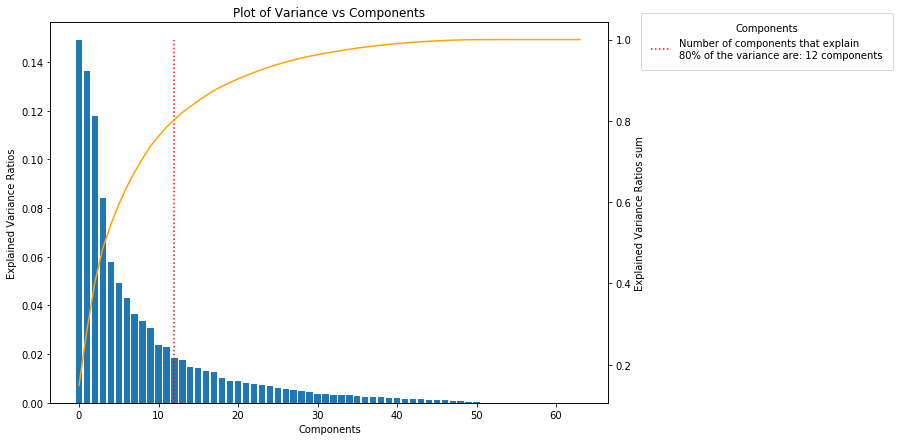

In [589]:
#NOTE:  PCA is a method where the dimesions are reduced is a way such that the dimensions are orthogonal to each 
# other. Hence, if we apply fit and transform to the data, the resulting vectors will be orthogonal and since the 
# number of components is equal to the number of features, this method will retain all the dimensions.
# print('The dimension of the MNIST data set before transformation is: ',data.shape)
n_components = data.shape[1] 
pca = PCA(n_components = n_components, svd_solver='full') # retains all the dimensions
pca.fit(data) # gets the pricipal components
data_pca = pca.transform(data)
# print('The dimension of the transformed MNIST data set is: ',data_pca.shape)
# explained_variance_ratio_: return the percentage of variance explained by each of the selected components.
sorted_indices = pca.explained_variance_ratio_.argsort()[::-1] # descending order of variance indices
sorted_variance_ratios = pca.explained_variance_ratio_[sorted_indices]
# ax = plt.figure(figsize=(10,7))
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(sorted_indices,sorted_variance_ratios)
plt.title('Plot of Variance vs Components')
ax.set_xlabel('Components')
ax.set_ylabel('Explained Variance Ratios')
# plt the cumulative graph
cumulative = np.cumsum(sorted_variance_ratios)
ax2 = ax.twinx()
ax2.plot(sorted_indices,cumulative,color='orange')
ax2.set_ylabel('Explained Variance Ratios sum')

# obtain the components at which 80% of the vairance is explained
variance = 0
component = ''
for i in range(64):
    if(variance > 0.8):        
        break
    component = i    
    variance +=  sorted_variance_ratios[i]
label = 'Number of components that explain \n80% of the variance are: '+str(component) + ' components'
ax.vlines(component,0,sorted_variance_ratios[0],linestyle=':',color='red',label=label)
ax.legend(loc='right')
ax.legend(loc='center left', bbox_to_anchor=[1.05, 0.95],borderpad=1,title='Components')
plt.axis('tight')
plt.show()
# print(component)

<div align="right"><font color="blue" size="4">10.0</font></div>

(b) 80% of the variance is a reasonable threshold because the graph has a shape similar to a rectangular hyperbola. This means that as we proceed along the x-axis the variance ratio value diminishes greatly. The reason PCA is performed on a data set is to reduce the dimensionality of the problem. We have to choose a certain minimum number of components such that the components cover, the majority of the variance. 80% is hence a reasonable threshold because it captures 80% of the variance within the data set while only requiring 12 principal components (a very small subset of the total number of components) to do so.

<div align="right"><font color="blue" size="4">2.0</font></div>

(c) The number of principal components required to explain 80% of the variance within the data set is 12. This means that if we choose the top 12 principal components with the greatest explained variance ratios we can cover 80% of the variance within the data set. There are totally 64 components and 12 components, is roughly 18% of the total number of components. Hence, by choosing a small subset of the components, we have successfully reduced the dimensionality of the problem while covering a majority of the variance within the data set.

<div align="right"><font color="blue" size="4">2.0</font></div>

<div align="left"><font color="green" size="4">should have commented on the fact that there are more dimenstions than there are class features and reasoned over why that might be.</font></div>

### ========== Question 2.2 --- [10 marks] ==========

Let us attempt to visualise the Principal Components.

&nbsp;&nbsp;**(a)** [Code] Use heatmap (set `cmap='binary'`) to visualise the first 3 principal components in the original 8x8 space. Label the plots and chose the colour range carefully. Also plot the mean value. *Hint: You should have 4 figures. Use the `components_`/`mean_` attributes of the `PCA` object you created.* <br>
&nbsp;&nbsp;**(b)** [Text] By making reference to the above plots, interpret the principal components and the mean. In your discussion (< 5 sentences) you should indicate what in general a principal component shows, how it relates to the original space and how the specific components (and mean) you visualised apply to our data.

<div align="right"><font color="blue" size="4">8.5/10.0</font></div>

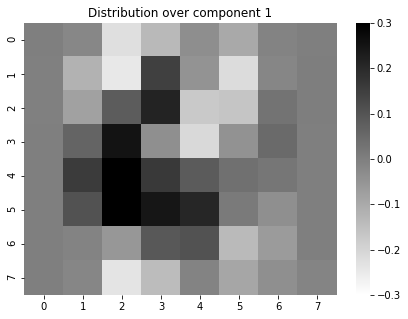

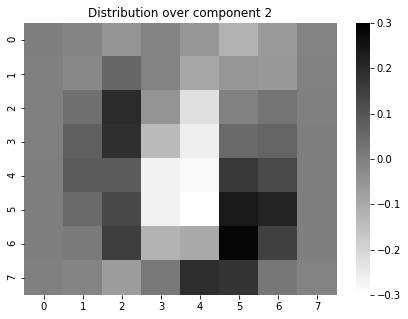

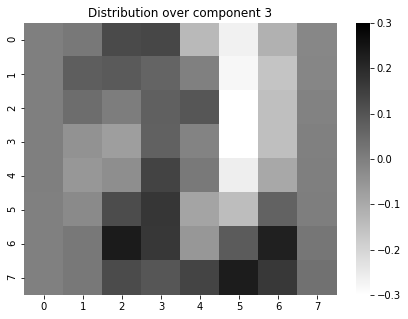

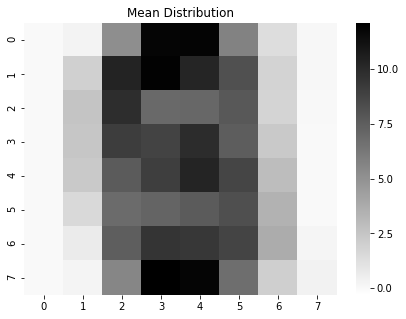

In [480]:
first3_pc = pca.components_[:3,:]
for i,component in enumerate(first3_pc):
    plt.figure(figsize=(7,5))
    title = 'Distribution over component '+str(i+1) 
    plt.title(title)
    component_reshaped = component.reshape((8,8))
    sns.heatmap(component_reshaped,cmap='binary',vmin=-0.3, vmax=0.3)
    plt.show()
title = 'Mean Distribution'
plt.figure(figsize=(7,5))
component_reshaped = pca.mean_.reshape(8,8)
sns.heatmap(component_reshaped,cmap='binary',vmin=-0.3)
plt.title(title)
plt.show()

<div align="right"><font color="blue" size="4">4.0</font></div>

(b) A principal component is a linear combination of the features in the original data set. Principal components are orthogonal vectors and statistically independent of one another. The heatmap distribution over components 1,2 and 3 show the variation of the pixel intensities if we were to consider just the isolated components. The heatmap distribution over the mean, however, captures the average pixel intensities over the entire set of the principal components.

<div align="right"><font color="blue" size="4">4.5</font></div>

<div align="left"><font color="green" size="4">Good explanation but missing link to data.</font></div>

### ========== Question 2.3 --- [14 marks] ==========

We now want to explore what these principal components (eigen-vectors) capture about the data. To do this, we will first project the data onto the PCA space, and then reconstruct it using successively more dimensions (eigen-vectors). To save us time, we will do this for the first image (`digits.data[0,:]`) which should itself be a 0.

&nbsp;&nbsp;**(a)** [Code] Let us first verify that PCA is indeed an invertible transform. Using heatmaps similarly to the previous question, display the original digit. Using the PCA object's `transform` method, project this into the PCA space, and then reconstruct the original digit by multiplying each dimension with the projection value. Show the reconstructed digit, and also print the Mean Absolute Differences (MAD) between the two. *Tip: the MAD should be 0 - if it is not, you may be forgetting to add something...* Label everything appropriately.<br>
&nbsp;&nbsp;&nbsp;*Hint: the PCA `transform` requires a 2D array, with the samples along the rows...*<br>
&nbsp;&nbsp;**(b)** [Code] Now we can analyse the quality of the reconstruction as we include more components. For the same digit, plot the reconstruction with `[0, 1, 2, 5, 15, 30]` components. For each reconstruction, compute and print (within the plot title) the MAD between the reconstruction and the original value.<br>
&nbsp;&nbsp;**(c)** [Text] Comment on the observations in the figures. How many components does it take to reconstruct the digit in a way that it is recogniseable?

<div align="right"><font color="blue" size="4">5.0/14.0</font></div>

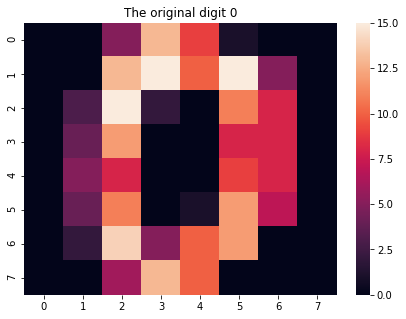

The MAD (Mean absolute Difference) between the vectors is:  0.0


/Users/ayushdas/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/decomposition/pca.py:423: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)


In [592]:
digit = 0
title = 'The original digit '
digit_zero = digits.data[0,:].reshape(8,8)
plt.figure(figsize=(7,5))
title += str(digit)
plt.title(title)
sns.heatmap(digit_zero)
plt.show()

n_components = digits.data.shape[1] 
pca0 = PCA(n_components = n_components, svd_solver='full') # retains all the dimensions

data0 = digits.data[0,:].reshape(1,-1)
pca0.fit(data0) # gets the pricipal components
data_pca0 = pca0.transform(data0)

data0 = data0.flatten()
data_pca0 = data_pca0.flatten()
projection_val = data_pca0[0]

construct_vals = projection_val * data0 + pca0.mean_

MAD = np.mean(np.absolute(construct_vals - data0))

print('The MAD (Mean absolute Difference) between the vectors is: ',MAD)

<div align="right"><font color="blue" size="4">4.0</font></div>

<div align="left"><font color="green" size="4">Transformed digit not printed.</font></div>

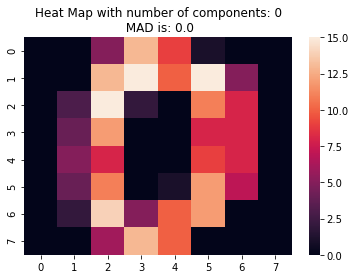

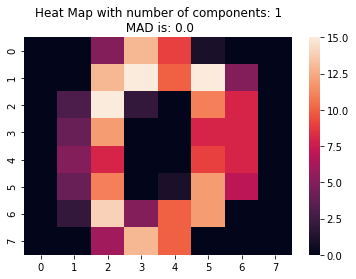

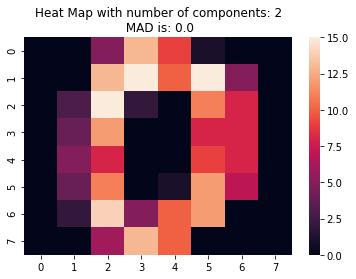

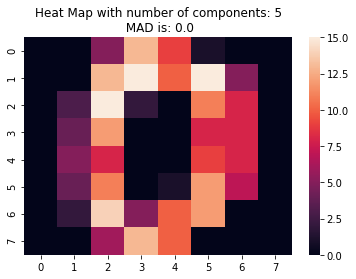

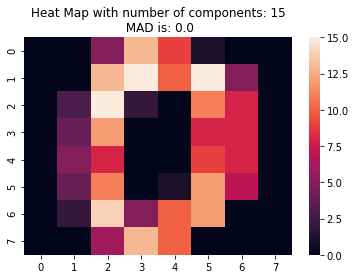

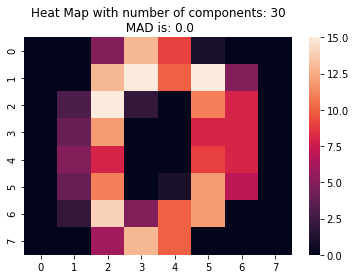

In [525]:
def plot_help(initial_vector,pca0,coeff,num_of_components):
    components = pca0.components_.flatten()
    construct_vals = pca0.mean_   # adding mean
    for i in range(num_of_components):
        construct_vals += coeff * components[i] # mean + coeff*component
    mad = np.mean(np.absolute(construct_vals - initial_vector))
    title = 'Heat Map with number of components: '+str(num_of_components)+'\n MAD is: '+str(mad)
#     print(mad)
    plt.figure()
    plt.title(title)
    sns.heatmap(construct_vals.reshape(8,8))
    plt.show()
    return construct_vals 
    

initial_vector = digits.data[0,:].reshape(1,-1) # taking the first row in digits.data as the initial_vector
projection_val = data_pca0[0]
components_list = [0,1,2,5,15,30]
for component in components_list:
    initial_vector = plot_help(initial_vector,pca0,projection_val,component)

<div align="right"><font color="blue" size="4">1.0</font></div>

<div align="left"><font color="green" size="4">You have made a mistake. this should not be identical.</font></div>

(c) The heatmap figures, for the one with 0 components to 30 components are identical. This means that without including any components (0 components) and constructing the digit with just the matrix from the values returned by pca0.mean_ results in the same heatmap as the one that is returned by including {1,2,5,15,30} pca components. Hence, the number of components required to reconstruct the digit in a way that it is recognizable is simply 0.

<div align="right"><font color="blue" size="4">0.0</font></div>

### ========== Question 2.4 --- (LEVEL 11) --- [18 marks] ==========

We will now investigate the effect PCA has on classification performance. Specifically we want to analyse whether the PCA transformation improves the performance of (i) an SVM and (ii) a Naive-Bayes classifier. We will use **5-Fold Cross-Validation** to evaluate our models using the mean accuracy provided by the `score` method of the classifiers in SKLearn. 

*N.B.: To ensure repeatability, set the `random_state=0` where applicable, and use the same KFold object (`shuffle=True`) throughout.*

&nbsp;&nbsp;**(a)** [Code] Train an SVM classifier ([`SVC`](http://scikit-learn.org/0.19/modules/generated/sklearn.svm.SVC.html)) with a linear kernel (keep all other parameters at defaults), first on the raw digit data, and then on the PCA-transformed data, **keeping all components**. Report the mean accuracy over folds in each case.<br>
&nbsp;&nbsp;**(b)** [Code] Now train a `NaiveBayes` classifier with default parameters in a similar manner (on raw and PCA-transformed data). Think carefully, and explain using programming comments, about which type of `NaiveBayes` implementation is applicable in this scenario, keeping in mind that we should use the same type for the Raw and PCA training. Again report the fold-averaged accuracy `score`.<br>
&nbsp;&nbsp;**(c)** [Text] What effect did PCA have on each of these classifiers? By referring to the theory behind each classifier type, explain why this is.

<div align="right"><font color="blue" size="4">15.5/18.0</font></div>

In [597]:
num_of_folds = 5
cvgen = KFold(n_splits=num_of_folds, shuffle=True, random_state=0)

linearKernel = SVC(kernel='linear',random_state=0)
linearKernel.fit(digits.data,digits.target)
score = cross_val_score(linearKernel,digits.data,digits.target,cv=cvgen)
print('Score of SVM classifier with linear kenernel on raw digit dataset:',score.mean())

n_components = digits.data.shape[1]
pca = PCA(n_components = n_components, svd_solver='full') # retains all the dimensions
pca.fit(digits.data)
pca_digits_data = pca.transform(digits.data)
linearKernel = SVC(kernel='linear',random_state=0)
linearKernel.fit(pca_digits_data, digits.target)
score = cross_val_score(linearKernel, pca_digits_data, digits.target, cv=cvgen)
print('Score of SVM classifier with linear kenernel on PCA transformed dataset:',score.mean())

Score of SVM classifier with linear kenernel on raw digit dataset: 0.9844227793252862
Score of SVM classifier with linear kenernel on PCA transformed dataset: 0.9844227793252862


<div align="right"><font color="blue" size="4">8.0</font></div>

In [599]:
# A Gaussian Naive Bayes classifier is appropriate as it can be used to process real valued attributes
gnb = GaussianNB()
gnb.fit(digits.data,digits.target)
score = cross_val_score(gnb,digits.data,digits.target,cv=cvgen)
print('Score of Gaussian Naive Bayes classifier on raw digit dataset:',score.mean())

n_components = digits.data.shape[1]
pca = PCA(n_components = n_components, svd_solver='full') # retains all the dimensions
pca.fit(digits.data)
pca_digits_data = pca.transform(digits.data)
gnb = GaussianNB()
gnb.fit(pca_digits_data, digits.target)
score = cross_val_score(gnb, pca_digits_data, digits.target, cv=cvgen)
print('Score of Gaussian Naive Bayes classifier on PCA transformed dataset:',score.mean())

Score of Gaussian Naive Bayes classifier on raw digit dataset: 0.8336118848653667
Score of Gaussian Naive Bayes classifier on PCA transformed dataset: 0.8887217579696689


<div align="right"><font color="blue" size="4">4.0</font></div>

(c) 

Observations:

PCA did not have any effect on the accuracy of the SVM classifier with linear kernel.

PCA helped improve the accuracy of the Gaussian Naive Baye's Classifier.

Reason:

A Gaussian Naive Bayes (gnb) classifier assumes that the features are independent, which may not be necessarily true in the dataset. PCA.transform() converts the data to be more independent (unrelated) and hence there is an improvement in the accuracy of the gnb classifier with pca. SVM's however, do not make any such assumption.

<div align="right"><font color="blue" size="4">3.5</font></div>

<div align="left"><font color="green" size="4">You are correct about Nb but wrong about SVMs. The roatation and transofrmation of PCA have no impact on SVMs (look up again how SVMs work)</font></div>